<a href="https://colab.research.google.com/github/safdarjung/OIBSIP/blob/main/email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# !unzip -j email_spam.zip
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [90]:
df=pd.read_csv("/content/spam.csv", encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [91]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [93]:
df["v2"].duplicated().sum()
df.drop_duplicates(inplace=True)

Spam


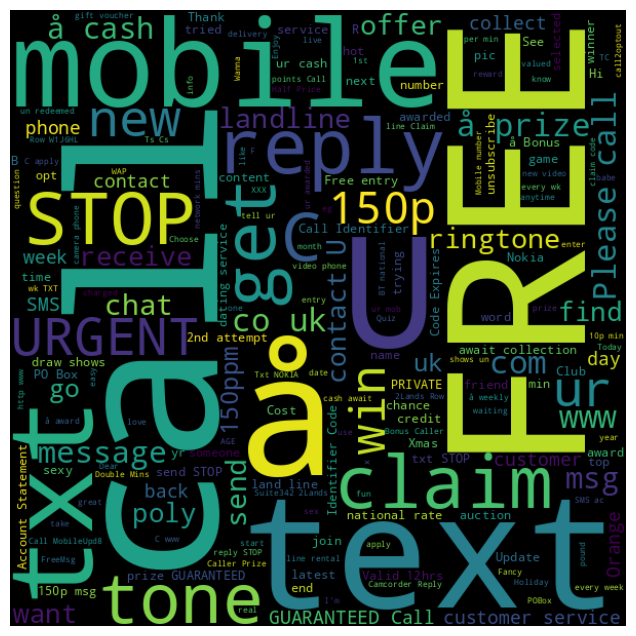

Ham


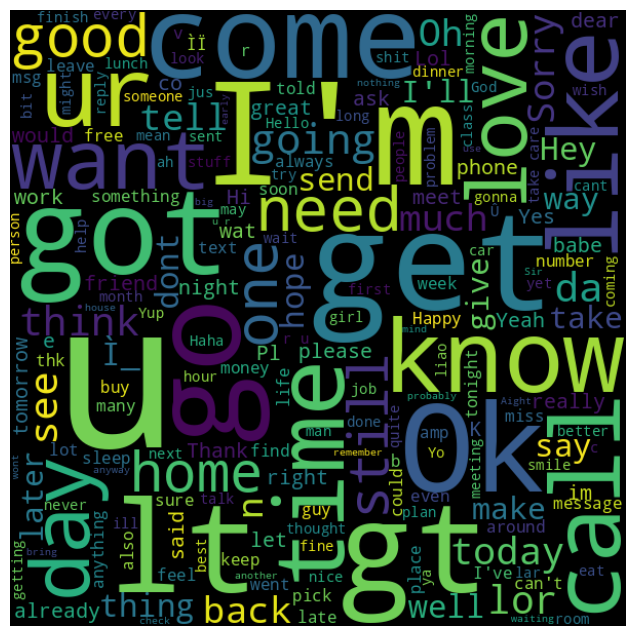

In [94]:
stopwords = set(stopwords.words('english'))
word_cloud = WordCloud(width = 600, height = 600, max_words = 200, stopwords = stopwords, background_color = 'black', max_font_size = 200)
spam = df.query("v1 == 'spam'").v2.str.cat(sep = ' ')
ham = df.query("v1 == 'ham'").v2.str.cat(sep = ' ')

print('Spam')
word_cloud.generate(spam)
plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Ham')
word_cloud.generate(ham)
plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [95]:
import re
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()
le.fit_transform(df['v1'])

lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # removing punctuations and numbers
  words = nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  text = " ".join(lemmatized_words)

  return text

df["v2"] = df["v2"].apply(preprocess_text)


In [96]:
'''
Converting the preprocessed text into numerical features using TF-IDF vectorization.
This captures the importance of words based on their frequency in a document and rarity across the corpus.
'''
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df["v2"])


In [97]:
print(features)

  (0, 8413)	0.1870602680320947
  (0, 1151)	0.3273183485378381
  (0, 3654)	0.1516547113925762
  (0, 7778)	0.15788597613794472
  (0, 2133)	0.27608938267454197
  (0, 1819)	0.3123348365474618
  (0, 4603)	0.27608938267454197
  (0, 8641)	0.23113884670341334
  (0, 3691)	0.18387947662291917
  (0, 1821)	0.27608938267454197
  (0, 4180)	0.10929420546950354
  (0, 5704)	0.16002038959736048
  (0, 1378)	0.25285984899245545
  (0, 2397)	0.25285984899245545
  (0, 6077)	0.22372328439867323
  (0, 4453)	0.3273183485378381
  (0, 8170)	0.22979492087206738
  (0, 3602)	0.1451035212454261
  (1, 5698)	0.5462048999760711
  (1, 8543)	0.4302122886209653
  (1, 4423)	0.5230619222770149
  (1, 4639)	0.40670634839035563
  (1, 5665)	0.27852067356750737
  (2, 71)	0.23093453356684593
  (2, 1237)	0.16307653387314142
  :	:
  (5167, 1854)	0.2822801742771951
  (5167, 3519)	0.2745768897051649
  (5167, 2963)	0.24306134227492665
  (5167, 7187)	0.20464939523848819
  (5167, 1847)	0.13809528830744416
  (5167, 2674)	0.187607894427647

In [98]:
X_train, X_test, y_train, y_test = train_test_split(features, df["v1"], test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [99]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9777562862669246
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.98      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [100]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Model:", accuracy)


Best Parameters: {'C': 10}
Best Score: 0.9777509068923822
Accuracy with Best Model: 0.9758220502901354
